In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import scipy.stats as sp
import seaborn as sns
from scipy.stats.stats import pearsonr
from datetime import datetime
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [2]:
data_er=pd.read_excel("Data_COMP5212project.xlsx",sheet_name="ER",index_col="Date", engine='openpyxl')
print(data_er.head(5))
#data_eurusd=data_er["EUR_USD"]
#data_eurusd=data_er["EUR_USD"]
#print(data_eurusd[:5])
#print(data_er.index[0])

            USD_CNY  USD_JPY  EUR_USD  USD_CAD  AUD_USD  USD_CHF  GBP_USD
Date                                                                     
1999-01-01   8.2778   116.32   1.1366   1.5105   0.6305   1.4160   1.6458
1999-02-01   8.2790   119.17   1.1025   1.5080   0.6188   1.4463   1.6030
1999-03-01   8.2800   118.86   1.0770   1.5080   0.6347   1.4825   1.6107
1999-04-01   8.2790   119.49   1.0570   1.4565   0.6615   1.5255   1.6095
1999-05-01   8.2784   121.52   1.0423   1.4739   0.6488   1.5272   1.6030


In [3]:
data_v=pd.read_excel("Data_COMP5212project.xlsx",sheet_name="Variables", index_col="Date", engine='openpyxl')
print(data_v.head(5))
#print(data_v.index[0])
#print(data_v["EuroStoxx50"])

            Shanghai    SP500  Nikkei225  EuroStoxx50    SPTSX  SPASX200  \
Date                                                                       
1999-01-01   1134.67  1279.64   14499.25          NaN  6729.56    2781.7   
1999-02-01   1090.09  1238.33   14367.54          NaN  6312.69    2768.4   
1999-03-01   1158.05  1286.37   15836.59          NaN  6597.79    2867.0   
1999-04-01   1120.93  1335.18   16701.53          NaN  7014.70    3027.8   
1999-05-01   1279.33  1301.84   16111.65          NaN  6841.80    2831.9   

               SMI  FT100  GoldPrice  BrentOilFutures  ...  STINT_CHE  \
Date                                                   ...              
1999-01-01  7201.2    NaN      286.3            11.35  ...    1.27167   
1999-02-01  7063.8    NaN      287.5            10.88  ...    1.26167   
1999-03-01  7130.2    NaN      279.8            15.24  ...    1.24833   
1999-04-01  7335.5    NaN      286.8            16.57  ...    0.99333   
1999-05-01  6911.6    NaN    

In [4]:
df_all=data_er.join(data_v)

In [5]:
df_all.tail()

,USD_CNY,USD_JPY,EUR_USD,USD_CAD,AUD_USD,USD_CHF,GBP_USD,Shanghai,SP500,Nikkei225,...,STINT_CHE,STINT_GBR,LTINT_CHN,LTINT_USA,LTINT_JPN,LTINT_EA19,LTINT_CAN,LTINT_AUS,LTINT_CHE,LTINT_GBR
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-01,6.6927,104.64,1.1647,1.3317,0.7026,0.9167,1.2941,3224.53,3269.96,22977.13,...,-0.7666,0.05,NaN,0.79,0.040,0.0005,0.602857,0.82,-0.518,0.3058
2020-11-01,6.5789,104.27,1.1928,1.3000,0.7345,0.9090,1.3321,3391.76,3621.63,26433.62,...,-0.7840,0.04,NaN,0.87,0.030,-0.0553,0.688500,0.87,-0.509,0.3836
2020-12-01,6.5250,103.24,1.2213,1.2730,0.7694,0.8851,1.3673,3473.07,3756.07,27444.17,...,-0.7638,0.03,NaN,0.93,0.020,-0.0915,0.730952,0.98,-0.525,0.3224
2021-01-01,6.4250,104.68,1.2136,1.2777,0.7642,0.8903,1.3702,3483.07,3714.24,27663.39,...,-0.7600,0.03,NaN,1.08,0.055,-0.0636,0.805500,1.05,-0.450,0.3672
2021-02-01,6.4730,106.58,1.2074,1.2739,0.7705,0.9082,1.3932,3509.08,3811.15,28966.01,...,-0.7500,0.05,NaN,1.26,0.150,0.0668,1.099474,1.32,-0.230,NaN


In [6]:
results = smf.ols('EUR_USD.diff(1) ~  SP500.diff(1) + EuroStoxx50.diff(1) + GoldPrice.diff(1) + BrentOilFutures.diff(1) + CPI_USA.diff(1) + CPI_EU.diff(1) + STINT_USA.diff(1) + STINT_EA19.diff(1) + LTINT_USA.diff(1) + LTINT_EA19.diff(1)', data=df_all).fit()
print(results.summary())

results = smf.ols('EUR_USD ~  SP500 + EuroStoxx50 + GoldPrice + BrentOilFutures + CPI_USA + CPI_EU + STINT_USA + STINT_EA19 + LTINT_USA + LTINT_EA19', data=df_all).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        EUR_USD.diff(1)   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     8.203
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           4.59e-11
Time:                        16:01:53   Log-Likelihood:                 435.11
No. Observations:                 208   AIC:                            -848.2
Df Residuals:                     197   BIC:                            -811.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

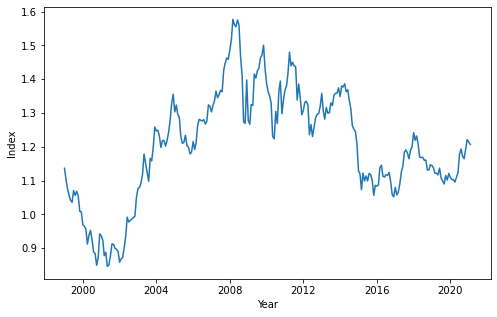

In [13]:
plt.figure(figsize=(8,5))
plt.plot(df_all["EUR_USD"])
plt.xlabel('Year')
plt.ylabel('Index')
plt.show()
#plt.plot(df_all["SP500"]/df_all["SP500"][0])
#plt.plot(df_all["EuroStoxx50"]/df_all["EuroStoxx50"][0])
#plt.plot(df_all["BrentOilFutures"]/df_all["BrentOilFutures"][0])
#plt.plot(df_all["CPI_USA"]/df_all["CPI_USA"][0])
#plt.plot(df_all["GoldPrice"]/df_all["GoldPrice"][0])

In [14]:
df_usdeu=df_all[['EUR_USD', 'SP500','EuroStoxx50','GoldPrice','BrentOilFutures', 'CPI_USA', 'CPI_EU', 'STINT_USA', 'STINT_EA19', 'LTINT_USA', 'LTINT_EA19']]

#add 1st differenced data
df_usdeu['EUR_USD_diff']=df_usdeu['EUR_USD'].diff(1)
df_usdeu['SP500_diff']=df_usdeu['SP500'].diff(1)
df_usdeu['EuroStoxx50_diff']=df_usdeu['EuroStoxx50'].diff(1)
df_usdeu['GoldPrice_diff']=df_usdeu['GoldPrice'].diff(1)
df_usdeu['BrentOilFutures_diff']=df_usdeu['BrentOilFutures'].diff(1)

df_usdeu['CPI_USA_diff']=df_usdeu['CPI_USA'].diff(1)
df_usdeu['CPI_EU_diff']=df_usdeu['CPI_EU'].diff(1)

df_usdeu['STINT_USA_diff']=df_usdeu['STINT_USA'].diff(1)
df_usdeu['STINT_EA19_diff']=df_usdeu['STINT_EA19'].diff(1)
df_usdeu['STINT_USA_EA19']=df_usdeu['STINT_USA']-df_usdeu['STINT_EA19']
df_usdeu['STINT_USA_EA19_diff']=df_usdeu['STINT_USA_diff']-df_usdeu['STINT_EA19_diff']

df_usdeu['LTINT_USA_diff']=df_usdeu['LTINT_USA'].diff(1)
df_usdeu['LTINT_EA19_diff']=df_usdeu['LTINT_EA19'].diff(1)
df_usdeu['LTINT_USA_EA19']=df_usdeu['LTINT_USA']-df_usdeu['LTINT_EA19']
df_usdeu['LTINT_USA_EA19_diff']=df_usdeu['LTINT_USA_diff']-df_usdeu['LTINT_EA19_diff']

df_usdeu.dropna(inplace=True)
print(df_usdeu.tail())
#print(df_usdeu.iloc[:,0])

results = smf.ols('EUR_USD ~   SP500 + EuroStoxx50 + BrentOilFutures + GoldPrice+ CPI_USA + CPI_EU + STINT_USA + STINT_EA19 + LTINT_USA + LTINT_EA19 + STINT_USA_EA19 + LTINT_USA_EA19', data=df_usdeu).fit()
#results = smf.ols('EUR_USD ~   SP500_diff + EuroStoxx50_diff + BrentOilFutures_diff + GoldPrice_diff + CPI_USA_diff + CPI_EU_diff +  STINT_USA_EA19 + LTINT_USA_EA19', data=df_usdeu).fit()
print(results.summary())

            EUR_USD    SP500  EuroStoxx50  GoldPrice  BrentOilFutures  \
Date                                                                    
2020-09-01   1.1718  3363.00      3193.61     1907.8            40.95   
2020-10-01   1.1647  3269.96      2958.21     1892.4            37.46   
2020-11-01   1.1928  3621.63      3492.54     1784.8            47.59   
2020-12-01   1.2213  3756.07      3552.64     1899.6            51.80   
2021-01-01   1.2136  3714.24      3481.44     1850.3            55.88   

             CPI_USA  CPI_EU  STINT_USA  STINT_EA19  LTINT_USA  ...  \
Date                                                            ...   
2020-09-01  109.8149  105.73       0.13     -0.4914       0.68  ...   
2020-10-01  109.8605  105.92       0.12     -0.5091       0.79  ...   
2020-11-01  109.7934  105.63       0.16     -0.5209       0.87  ...   
2020-12-01  109.8968  105.97       0.17     -0.5381       0.93  ...   
2021-01-01  110.3642  106.27       0.14     -0.5472       1.08

C:\Users\w\Anaconda2\envs\UC\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\w\Anaconda2\envs\UC\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\w\Anaconda2\envs\UC\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [15]:
#test the stationarity of data using ADF test

from statsmodels.tsa.stattools import adfuller
for i in range(len(df_usdeu.columns)):
  print(df_usdeu.columns[i])
  result = adfuller(df_usdeu.iloc[:,i])
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])

#p-value < 0.1 meaning that it is stationary at 10% confidence level

EUR_USD
ADF Statistic: -1.161824
p-value: 0.689799
SP500
ADF Statistic: 1.665970
p-value: 0.998043
EuroStoxx50
ADF Statistic: -2.202281
p-value: 0.205419
GoldPrice
ADF Statistic: -1.285797
p-value: 0.635645
BrentOilFutures
ADF Statistic: -2.775751
p-value: 0.061822
CPI_USA
ADF Statistic: -1.373729
p-value: 0.594804
CPI_EU
ADF Statistic: -1.518814
p-value: 0.524184
STINT_USA
ADF Statistic: -2.241063
p-value: 0.191681
STINT_EA19
ADF Statistic: -1.096276
p-value: 0.716555
LTINT_USA
ADF Statistic: -1.480270
p-value: 0.543248
LTINT_EA19
ADF Statistic: -0.509790
p-value: 0.890092
EUR_USD_diff
ADF Statistic: -5.712690
p-value: 0.000001
SP500_diff
ADF Statistic: -4.372917
p-value: 0.000331
EuroStoxx50_diff
ADF Statistic: -10.702166
p-value: 0.000000
GoldPrice_diff
ADF Statistic: -3.557456
p-value: 0.006628
BrentOilFutures_diff
ADF Statistic: -10.498521
p-value: 0.000000
CPI_USA_diff
ADF Statistic: -7.394027
p-value: 0.000000
CPI_EU_diff
ADF Statistic: -2.753616
p-value: 0.065211
STINT_USA_diff

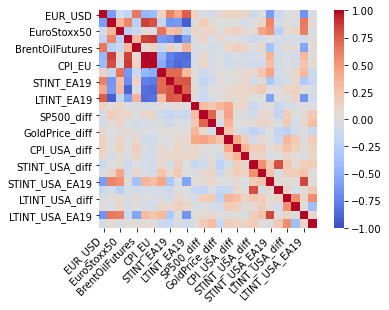

In [16]:
# correlation matrix and heatmap
corr_usdeu=df_usdeu.corr()
#print(corr_usdeu)
ax = sns.heatmap(
    corr_usdeu, 
    vmin=-1, vmax=1, center=0,
    cmap="coolwarm",
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

C:\Users\w\Anaconda2\envs\UC\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


SVR
[1.35189597 1.37695824 1.37596353 1.42070155 1.35428691 1.3647797
 1.37006905 1.39879447 1.40810118 1.40737427 1.40378692 1.39491337
 1.3919955  1.35543771 1.41151585 1.413224   1.37818445 1.405498
 1.40000613 1.37702108 1.3754471  1.39064347 1.39080772 1.40067112
 1.43142211 1.38806954 1.40525314 1.36244779 1.41242352 1.36258608
 1.42468431 1.2952911  1.46409981 1.33936422 1.41636117 1.40695007
 1.37839747 1.42364086 1.39739623 1.36567985 1.38890979 1.375423
 1.36369731 1.34965085 1.42330732 1.41751458 1.41793897 1.40369223
 1.40938783 1.37976378 1.38647823 1.40141662 1.35825587 1.42496253
 1.36933071 1.42284777 1.40860255 1.34609792 1.39883124 1.41264974
 1.41439973 1.42562542 1.41975919 1.40084653 1.41172833 1.4267807
 1.42637645 1.4090936  1.34735263 1.3936221  1.36513963 1.43331871
 1.41987088 1.42532366 1.43739982 1.42111339 1.33301179 1.41877031
 1.35107372 1.39601148 1.41299674 1.42509071 1.42093201 1.33251975
 1.36623471 1.43713746 1.43008509 1.4258689  1.4429676  1.443168

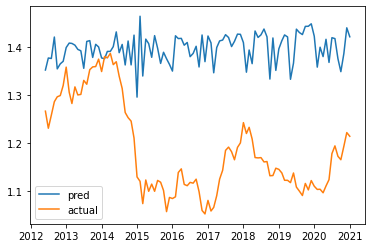

In [17]:
df_usdeu.dropna(inplace=True)
usdeu_y=df_usdeu['EUR_USD']
#usdeu_x=df_usdeu.drop('EUR_USD', axis=1)
usdeu_x=df_usdeu[['SP500_diff','EuroStoxx50_diff','GoldPrice_diff','BrentOilFutures_diff','CPI_USA','CPI_EU','STINT_USA_EA19','LTINT_USA_EA19']]
test_size=0.5
usdeu_x_train, usdeu_x_test, usdeu_y_train, usdeu_y_test = train_test_split(usdeu_x, usdeu_y, test_size = test_size, shuffle=False )

#print(len(usdeu_x_train))
#print(len(usdeu_x_test))
#print(len(usdeu_y_train))
#print(len(usdeu_y_test))

#train OLS 
from sklearn import svm
from sklearn.svm import SVC

clf = svm.SVR()
clf.fit(usdeu_x_train, usdeu_y_train)
print("SVR")
print(clf.predict(usdeu_x_test))
print("Accuracy on training set: {:.2f}".format(clf.score(usdeu_x_train, usdeu_y_train)))
print("Accuracy on test set: {:.2f}".format(clf.score(usdeu_x_test, usdeu_y_test)))
pred_lin_0 = clf.predict(usdeu_x_test)
pred_lin_0 = pd.Series(pred_lin_0,index=usdeu_y_test.index)

#print(linReg.coef_)
#print(linReg.intercept_)
plt.plot(pred_lin_0)
plt.plot(usdeu_y_test)
plt.legend(["pred","actual"])
plt.show()

#usdeu_x_train.to_excel("output1.xlsx", sheet_name='usdeu_x_train')  

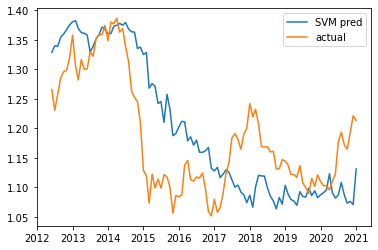

MAE: 0.06935489857926447
MSE: 0.007103608234869654
RMSE: 0.08428290594699292
R-squared:  0.21138186822555494
Accuracy: 94.03 %.


In [18]:
#one-step ahead predictions for recursive linear regression
# y(t)= b*X(t-1)   X(t-1) includes exchange rates and other variables at time t-1

from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

df_len=len(df_usdeu)
#print(df_len)
#print(len(usdeu_y))
start_pred_pos = int(df_len*(1-test_size))
#print(start_pred_pos)
lin_preds_1=[]
for i in range(start_pred_pos-1, df_len-1):
  #print(i)
  #print(df_usdeu[:i])
  #print(usdeu_y[1:i+1])

  #linReg = LinearRegression().fit(df_usdeu[:i], usdeu_y[1:i+1])
  clf = svm.SVR()
  clf.fit(df_usdeu[:i], usdeu_y[1:i+1])

  #linReg = xgb.XGBRegressor().fit(df_usdeu[:i], usdeu_y[1:i+1])
  #linReg = RandomForestRegressor().fit(df_usdeu[:i], usdeu_y[1:i+1])
  #print(df_usdeu[:i])
  #print(len(df_usdeu[:i]))
  lin_pred = clf.predict(df_usdeu[i:i+1])
  #print("pred: ", lin_pred)
  lin_preds_1.append(lin_pred[0])
lin_preds_1=pd.Series(lin_preds_1,index=usdeu_y_test.index)
#print(len(lin_preds_1))
#print(len(usdeu_y_test))
#print(lin_preds_1)
#print(usdeu_y_test[-3:])
plt.plot(lin_preds_1)
plt.plot(usdeu_y_test)
plt.legend(["SVM pred","actual"])
plt.show()
errors=lin_preds_1-usdeu_y_test
AE=abs(errors)

print('MAE:', metrics.mean_absolute_error(usdeu_y_test, lin_preds_1))
print('MSE:', metrics.mean_squared_error(usdeu_y_test, lin_preds_1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(usdeu_y_test, lin_preds_1)))
print ('R-squared: ',metrics.r2_score(usdeu_y_test, lin_preds_1)) 

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (AE / usdeu_y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', np.round(accuracy, 2), '%.')

MAE: 0.019536538461538466
MSE: 0.0006113505769230772
RMSE: 0.02472550458379115
R-squared:  0.9321299635492704
Accuracy: 98.35 %.


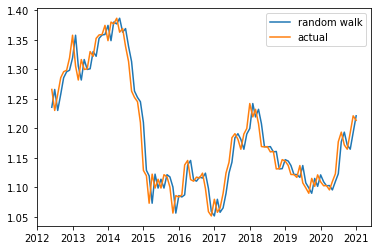

In [19]:
#random walk model without drift
eurusd_pred_rw = df_usdeu["EUR_USD"].shift(1)
errors_rw = eurusd_pred_rw[start_pred_pos:] - df_usdeu["EUR_USD"][start_pred_pos:]
plt.plot(eurusd_pred_rw[start_pred_pos:])
plt.plot(df_usdeu["EUR_USD"][start_pred_pos:])
plt.legend(["random walk","actual"]) 
#print(errors_rw)

AE_rw=abs(errors_rw)

print('MAE:', metrics.mean_absolute_error(df_usdeu["EUR_USD"][start_pred_pos:], eurusd_pred_rw[start_pred_pos:]))
print('MSE:', metrics.mean_squared_error(df_usdeu["EUR_USD"][start_pred_pos:], eurusd_pred_rw[start_pred_pos:]))
print('RMSE:', np.sqrt(metrics.mean_squared_error(df_usdeu["EUR_USD"][start_pred_pos:], eurusd_pred_rw[start_pred_pos:])))
print ('R-squared: ',metrics.r2_score(df_usdeu["EUR_USD"][start_pred_pos:], eurusd_pred_rw[start_pred_pos:])) 

# Calculate mean absolute percentage error (MAPE)
mape_rw = 100 * (AE_rw / df_usdeu["EUR_USD"][start_pred_pos:])
# Calculate and display accuracy
accuracy_rw = 100 - np.mean(mape_rw)
print('Accuracy:', np.round(accuracy_rw, 2), '%.')

In [20]:
#DM tests
from dm_test import dm_test
rt = dm_test(pd.to_numeric(usdeu_y_test),pd.to_numeric(eurusd_pred_rw[start_pred_pos:]),pd.to_numeric(lin_preds_1), h = 1, crit="MSE")
print(rt)
#p-vale<0.1 meaning that the linear predictions are statiscally different from those of random walk . 


dm_return(DM=-7.838748421017522, p_value=4.3398081381921555e-12)


In [23]:
Pred_GoingUp=lin_preds_1>df_usdeu["EUR_USD"][start_pred_pos-1:].shift(1)[1:]*(1.002)
actual_GoingUP=usdeu_y_test>df_usdeu["EUR_USD"][start_pred_pos-1:].shift(1)[1:]
print("going up or down accuracy: ",(Pred_GoingUp==actual_GoingUP).mean())
print("proportion of days of going up: ",actual_GoingUP.mean())

from dateutil.relativedelta import relativedelta

#print(df_usdeu["EUR_USD"][start_pred_pos-1:].shift(1)[1:])
#print(Pred_GoingUp)
#print(actual_GoingUP)
#print(len(Pred_GoingUp))
#print(len(lin_preds_1))
#print(usdeu_y_test.shift(1))
#print(usdeu_y_test)
#print(lin_preds_1)

going up or down accuracy:  0.5192307692307693
proportion of days of going up:  0.49038461538461536


KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: DatetimeIndex(['2012-05-01'], dtype='datetime64[ns]', name='Date', freq=None). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

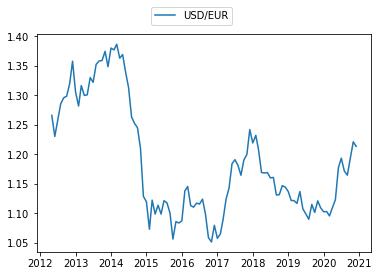

In [24]:
#construct an investment portfolio
#long a contract if the price is predicted to go up
#short a contract if the price is predicted to go down

from dateutil.relativedelta import relativedelta

cost_ratio=0.002  # 0.002 means 0.2% transaction cost
profits=[]
buy_signal=[]
sell_signal=[]
#signals=[]
buy_prices=[]
sell_prices=[]

#initial condition
if Pred_GoingUp[0]==1:
  buy_signal.append(Pred_GoingUp.index[0]-relativedelta(months=1))
  #signals.append(1)
  buy_price=df_usdeu["EUR_USD"][buy_signal[-1]]
  buy_prices.append(buy_price)
  #print(buy_price)
if Pred_GoingUp[0]==0:
  sell_signal.append(Pred_GoingUp.index[0]-relativedelta(months=1))
  #signals.append(-1)
  sell_price=df_usdeu["EUR_USD"][sell_signal[-1]]
  sell_prices.append(sell_price)
  #print(sell_price)

profits.append(0)

#after the initial value
for i in range(1,len(Pred_GoingUp)):
  #long
  if Pred_GoingUp[i-1]==0 and Pred_GoingUp[i]==1 :
    buy_signal.append(Pred_GoingUp.index[i-1])
    #signals.append(1)
    buy_price=df_usdeu["EUR_USD"][buy_signal[-1]]
    buy_prices.append(buy_price)
    profits.append((df_usdeu["EUR_USD"][Pred_GoingUp.index[i-2]]-df_usdeu["EUR_USD"][Pred_GoingUp.index[i-1]])*(1-2*cost_ratio))
  #short  
  if Pred_GoingUp[i-1]==1 and Pred_GoingUp[i]==0 :
    sell_signal.append(Pred_GoingUp.index[i-1])
    #signals.append(-1)
    sell_price=df_usdeu["EUR_USD"][sell_signal[-1]]
    sell_prices.append(sell_price)
    profits.append((df_usdeu["EUR_USD"][Pred_GoingUp.index[i-1]]-df_usdeu["EUR_USD"][Pred_GoingUp.index[i-2]])*(1-2*cost_ratio))
    
  #hold  
  if (Pred_GoingUp[i-1]==1 and Pred_GoingUp[i]==1):
    #signals.append(0)
    profits.append(df_usdeu["EUR_USD"][Pred_GoingUp.index[i-1]]-df_usdeu["EUR_USD"][Pred_GoingUp.index[i-2]])

  if (Pred_GoingUp[i-1]==0 and Pred_GoingUp[i]==0):
    #signals.append(0)
    profits.append(df_usdeu["EUR_USD"][Pred_GoingUp.index[i-2]]-df_usdeu["EUR_USD"][Pred_GoingUp.index[i-1]])


cum_profits=np.cumsum(profits)
cum_profits=pd.Series(cum_profits,index=df_usdeu["EUR_USD"][start_pred_pos-1:-1].index)
#print(usdeu_y_test[buy_signal])
#print(sell_signal)
#print(Pred_GoingUp)
#print(df_usdeu["EUR_USD"][start_pred_pos-1:-1])

plt.plot(df_usdeu["EUR_USD"][start_pred_pos-1:-1].index,usdeu_y_test.values)
plt.legend(["USD/EUR"],bbox_to_anchor =(0.6, 1.15), ncol = 2)
plt.plot(buy_signal,usdeu_y_test[buy_signal],'^', markersize=5, color='g')
plt.plot(sell_signal,df_usdeu["EUR_USD"][start_pred_pos-1:-1][sell_signal],'v', markersize=5, color='r')
plt.show()


plt.plot(df_usdeu["EUR_USD"][start_pred_pos-1:-1].index,cum_profits.values)
plt.legend(["cumulative profits"],bbox_to_anchor =(0.7, 1.15), ncol = 2)
plt.show()

#print(len(profits))
#signals=pd.Series(signals,index=usdeu_y_test.index)
#print(len(signals))
#print(cum_profits)